## Lab results experiment v4

In [1]:
import src.utils as utils
from src.solvers import pg_solver
from ray import tune

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

from tbparse import SummaryReader
import seaborn as sns; sns.set_theme()

2023-05-31 12:08:59.855415: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-31 12:09:00.400642: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Load best results from hyperparameter tuning
#exp_path = 'hypersearch2/pg_solver/0020/0020/rand_n=0020_k=03_m=0020_i=01/arch'
exp_path = 'hypersearch/pg_solver/0050/0050/rand_n=0050_k=03_m=0050_i=01/arch'
restored_tuner =tune.Tuner.restore(path=exp_path, trainable=pg_solver)
results = restored_tuner.get_results()

# Check if there have been any errors
print(results.errors)
print(results.num_errors)
print(results.num_terminated)

TypeError: __randomstate_ctor() takes from 0 to 1 positional arguments but 2 were given

In [14]:
# Load best results from hyperparameter tuning
exp_path = 'hypersearch/pg_solver/0050/0050/rand_n=0050_k=03_m=0050_i=01/arch'
restored_tuner =tune.Tuner.restore(path=exp_path, trainable=pg_solver)
results = restored_tuner.get_results()

# Check if there have been any errors
print(results.errors)
print(results.num_errors)
print(results.num_terminated)

TypeError: __randomstate_ctor() takes from 0 to 1 positional arguments but 2 were given

In [5]:
num_vars = 50
exp_folder = 'hypersearch/pg_solver'

# Get path for every hyperparameter search
exp_folder = os.path.join(exp_folder, f'{num_vars:04d}')
folder_clauses = sorted([os.path.join(exp_folder, folder) for folder in os.listdir(exp_folder)])
folder_instances = sorted([os.path.join(folder, instance) for folder in folder_clauses for instance in os.listdir(folder)])
folder_assumption = sorted([os.path.join(folder, assumption) for folder in folder_instances for assumption in os.listdir(folder)])
folder_assumption


['hypersearch/pg_solver/0050/0050/rand_n=0050_k=03_m=0050_i=01/arch',
 'hypersearch/pg_solver/0050/0050/rand_n=0050_k=03_m=0050_i=01/baseline',
 'hypersearch/pg_solver/0050/0050/rand_n=0050_k=03_m=0050_i=02/arch',
 'hypersearch/pg_solver/0050/0050/rand_n=0050_k=03_m=0050_i=02/baseline',
 'hypersearch/pg_solver/0050/0050/rand_n=0050_k=03_m=0050_i=03/arch',
 'hypersearch/pg_solver/0050/0050/rand_n=0050_k=03_m=0050_i=03/baseline',
 'hypersearch/pg_solver/0050/0050/rand_n=0050_k=03_m=0050_i=04/arch',
 'hypersearch/pg_solver/0050/0050/rand_n=0050_k=03_m=0050_i=04/baseline',
 'hypersearch/pg_solver/0050/0050/rand_n=0050_k=03_m=0050_i=05/arch',
 'hypersearch/pg_solver/0050/0050/rand_n=0050_k=03_m=0050_i=05/baseline',
 'hypersearch/pg_solver/0050/0050/rand_n=0050_k=03_m=0050_i=06/arch',
 'hypersearch/pg_solver/0050/0050/rand_n=0050_k=03_m=0050_i=06/baseline',
 'hypersearch/pg_solver/0050/0050/rand_n=0050_k=03_m=0050_i=07/arch',
 'hypersearch/pg_solver/0050/0050/rand_n=0050_k=03_m=0050_i=07/bas

In [6]:
for i, search_path in enumerate(folder_assumption):
    restored_tuner =tune.Tuner.restore(path=search_path, trainable=pg_solver)
    results = restored_tuner.get_results()
    if results.num_errors > 0:
        print(i, results.errors, results.num_errors, results.num_terminated)
        print(search_path)
        print()

TypeError: __randomstate_ctor() takes from 0 to 1 positional arguments but 2 were given

In [2]:
num_vars = 50
exp_dir = 'hypersearch/pg_solver'
exp_path = os.path.join(exp_dir, f'{num_vars:04d}')

reader = SummaryReader(exp_path, pivot=False, extra_columns={'dir_name'})
df = reader.tensors
df

""


## Lab results experiment v1

In [1]:
import src.utils as utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

from tbparse import SummaryReader
import seaborn as sns; sns.set_theme()

2023-03-31 14:09:20.957142: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 14:09:21.780027: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.8/lib64::/home/omargp/miniconda3/lib/:/home/omargp/miniconda3/lib/:/home/omargp/miniconda3/envs/sat/lib/
2023-03-31 14:09:21.780124: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/l

In [2]:
num_vars = 40
output_dir = 'outputs'
exp_name = os.path.join(output_dir, f'exp_{num_vars:04d}')

reader = SummaryReader(exp_name, pivot=False, extra_columns={'dir_name'})
df = reader.tensors
df

,step,tag,value,dir_name
0,640,active_search,38.000000,0040/t-0_n-0_b-0/run_i-2-20230331T002351/logs
1,1280,active_search,39.000000,0040/t-0_n-0_b-0/run_i-2-20230331T002351/logs
2,1920,active_search,39.000000,0040/t-0_n-0_b-0/run_i-2-20230331T002351/logs
3,2560,active_search,39.000000,0040/t-0_n-0_b-0/run_i-2-20230331T002351/logs
4,3200,active_search,39.000000,0040/t-0_n-0_b-0/run_i-2-20230331T002351/logs
...,...,...,...,...
61727,23680,pg_loss_with_ent,58.065369,0128/t-1_n-1_b-1/run_i-6-20230331T114341/logs
61728,24320,pg_loss_with_ent,59.916973,0128/t-1_n-1_b-1/run_i-6-20230331T114341/logs
61729,24960,pg_loss_with_ent,68.300400,0128/t-1_n-1_b-1/run_i-6-20230331T114341/logs
61730,25600,pg_loss_with_ent,58.003735,0128/t-1_n-1_b-1/run_i-6-20230331T114341/logs


In [3]:
# Keep only rows with tag == 'active_search'
df = df[df['tag'] == 'active_search']
df

,step,tag,value,dir_name
0,640,active_search,38.0,0040/t-0_n-0_b-0/run_i-2-20230331T002351/logs
1,1280,active_search,39.0,0040/t-0_n-0_b-0/run_i-2-20230331T002351/logs
2,1920,active_search,39.0,0040/t-0_n-0_b-0/run_i-2-20230331T002351/logs
3,2560,active_search,39.0,0040/t-0_n-0_b-0/run_i-2-20230331T002351/logs
4,3200,active_search,39.0,0040/t-0_n-0_b-0/run_i-2-20230331T002351/logs
...,...,...,...,...
61317,23680,active_search,125.0,0128/t-1_n-1_b-1/run_i-6-20230331T114341/logs
61318,24320,active_search,125.0,0128/t-1_n-1_b-1/run_i-6-20230331T114341/logs
61319,24960,active_search,125.0,0128/t-1_n-1_b-1/run_i-6-20230331T114341/logs
61320,25600,active_search,125.0,0128/t-1_n-1_b-1/run_i-6-20230331T114341/logs


In [4]:
# Keep only step and value columns
df = df[['step', 'value', 'dir_name']]
df

,step,value,dir_name
0,640,38.0,0040/t-0_n-0_b-0/run_i-2-20230331T002351/logs
1,1280,39.0,0040/t-0_n-0_b-0/run_i-2-20230331T002351/logs
2,1920,39.0,0040/t-0_n-0_b-0/run_i-2-20230331T002351/logs
3,2560,39.0,0040/t-0_n-0_b-0/run_i-2-20230331T002351/logs
4,3200,39.0,0040/t-0_n-0_b-0/run_i-2-20230331T002351/logs
...,...,...,...
61317,23680,125.0,0128/t-1_n-1_b-1/run_i-6-20230331T114341/logs
61318,24320,125.0,0128/t-1_n-1_b-1/run_i-6-20230331T114341/logs
61319,24960,125.0,0128/t-1_n-1_b-1/run_i-6-20230331T114341/logs
61320,25600,125.0,0128/t-1_n-1_b-1/run_i-6-20230331T114341/logs


In [5]:
# Keep only the max num of sat clases reached
df = df.sort_values('value', ascending=True).drop_duplicates(['dir_name'], keep='last')
df

,step,value,dir_name
2586,1280,39.0,0040/t-1_n-1_b-0/run_i-6-20230331T000624/logs
2850,1280,40.0,0040/t-1_n-1_b-1/run_i-2-20230331T000045/logs
189,1920,40.0,0040/t-0_n-0_b-0/run_i-4-20230331T002537/logs
176,640,40.0,0040/t-0_n-0_b-0/run_i-3-20230331T002531/logs
15,10240,40.0,0040/t-0_n-0_b-0/run_i-2-20230331T002351/logs
...,...,...,...
56930,24960,126.0,0128/t-1_n-0_b-1/run_i-6-20230331T124814/logs
59627,19200,127.0,0128/t-1_n-1_b-1/run_i-2-20230331T110701/logs
56233,22400,128.0,0128/t-1_n-0_b-1/run_i-4-20230331T123442/logs
56611,17920,128.0,0128/t-1_n-0_b-1/run_i-5-20230331T124226/logs


In [6]:
# Split dir_name into m, config and run id
df_str = df.dir_name.str.split('/', expand=True).rename(columns={0:'m', 1:'config', 2: 'run_id' }).drop([3], axis=1)
df_str

,m,config,run_id
2586,0040,t-1_n-1_b-0,run_i-6-20230331T000624
2850,0040,t-1_n-1_b-1,run_i-2-20230331T000045
189,0040,t-0_n-0_b-0,run_i-4-20230331T002537
176,0040,t-0_n-0_b-0,run_i-3-20230331T002531
15,0040,t-0_n-0_b-0,run_i-2-20230331T002351
...,...,...,...
56930,0128,t-1_n-0_b-1,run_i-6-20230331T124814
59627,0128,t-1_n-1_b-1,run_i-2-20230331T110701
56233,0128,t-1_n-0_b-1,run_i-4-20230331T123442
56611,0128,t-1_n-0_b-1,run_i-5-20230331T124226


In [7]:
# Split run_id and get instance number
df_i = df_str.run_id.str.split('-', expand=True).rename(columns={1:'inst'}).drop([0,2], axis=1)
df_i

,inst
2586,6
2850,2
189,4
176,3
15,2
...,...
56930,6
59627,2
56233,4
56611,5


In [8]:
# Del run_id from df_str
df_str = df_str.drop(['run_id'], axis=1)
df_str

,m,config
2586,0040,t-1_n-1_b-0
2850,0040,t-1_n-1_b-1
189,0040,t-0_n-0_b-0
176,0040,t-0_n-0_b-0
15,0040,t-0_n-0_b-0
...,...,...
56930,0128,t-1_n-0_b-1
59627,0128,t-1_n-1_b-1
56233,0128,t-1_n-0_b-1
56611,0128,t-1_n-0_b-1


In [9]:
# Concat df_str and df_i
df_2 = pd.concat([df_str, df_i], axis=1)
df_2 

,m,config,inst
2586,0040,t-1_n-1_b-0,6
2850,0040,t-1_n-1_b-1,2
189,0040,t-0_n-0_b-0,4
176,0040,t-0_n-0_b-0,3
15,0040,t-0_n-0_b-0,2
...,...,...,...
56930,0128,t-1_n-0_b-1,6
59627,0128,t-1_n-1_b-1,2
56233,0128,t-1_n-0_b-1,4
56611,0128,t-1_n-0_b-1,5


In [10]:
# Concat df and df_2
df_results = pd.concat([df, df_2], axis=1)
df_results

,step,value,dir_name,m,config,inst
2586,1280,39.0,0040/t-1_n-1_b-0/run_i-6-20230331T000624/logs,0040,t-1_n-1_b-0,6
2850,1280,40.0,0040/t-1_n-1_b-1/run_i-2-20230331T000045/logs,0040,t-1_n-1_b-1,2
189,1920,40.0,0040/t-0_n-0_b-0/run_i-4-20230331T002537/logs,0040,t-0_n-0_b-0,4
176,640,40.0,0040/t-0_n-0_b-0/run_i-3-20230331T002531/logs,0040,t-0_n-0_b-0,3
15,10240,40.0,0040/t-0_n-0_b-0/run_i-2-20230331T002351/logs,0040,t-0_n-0_b-0,2
...,...,...,...,...,...,...
56930,24960,126.0,0128/t-1_n-0_b-1/run_i-6-20230331T124814/logs,0128,t-1_n-0_b-1,6
59627,19200,127.0,0128/t-1_n-1_b-1/run_i-2-20230331T110701/logs,0128,t-1_n-1_b-1,2
56233,22400,128.0,0128/t-1_n-0_b-1/run_i-4-20230331T123442/logs,0128,t-1_n-0_b-1,4
56611,17920,128.0,0128/t-1_n-0_b-1/run_i-5-20230331T124226/logs,0128,t-1_n-0_b-1,5


In [11]:
# Del dir_name and step column from df_results
df_results = df_results.drop(['dir_name', 'step'], axis=1)
df_results

,value,m,config,inst
2586,39.0,0040,t-1_n-1_b-0,6
2850,40.0,0040,t-1_n-1_b-1,2
189,40.0,0040,t-0_n-0_b-0,4
176,40.0,0040,t-0_n-0_b-0,3
15,40.0,0040,t-0_n-0_b-0,2
...,...,...,...,...
56930,126.0,0128,t-1_n-0_b-1,6
59627,127.0,0128,t-1_n-1_b-1,2
56233,128.0,0128,t-1_n-0_b-1,4
56611,128.0,0128,t-1_n-0_b-1,5


In [12]:
df_results['n'] = num_vars
df_results

,value,m,config,inst,n
2586,39.0,0040,t-1_n-1_b-0,6,40
2850,40.0,0040,t-1_n-1_b-1,2,40
189,40.0,0040,t-0_n-0_b-0,4,40
176,40.0,0040,t-0_n-0_b-0,3,40
15,40.0,0040,t-0_n-0_b-0,2,40
...,...,...,...,...,...
56930,126.0,0128,t-1_n-0_b-1,6,40
59627,127.0,0128,t-1_n-1_b-1,2,40
56233,128.0,0128,t-1_n-0_b-1,4,40
56611,128.0,0128,t-1_n-0_b-1,5,40


In [13]:
df_results['m'] = df_results['m'].astype(float)
df_results

,value,m,config,inst,n
2586,39.0,40.0,t-1_n-1_b-0,6,40
2850,40.0,40.0,t-1_n-1_b-1,2,40
189,40.0,40.0,t-0_n-0_b-0,4,40
176,40.0,40.0,t-0_n-0_b-0,3,40
15,40.0,40.0,t-0_n-0_b-0,2,40
...,...,...,...,...,...
56930,126.0,128.0,t-1_n-0_b-1,6,40
59627,127.0,128.0,t-1_n-1_b-1,2,40
56233,128.0,128.0,t-1_n-0_b-1,4,40
56611,128.0,128.0,t-1_n-0_b-1,5,40


In [14]:
df_results.insert(5, 'r', df_results["m"] / df_results["n"])
df_results

,value,m,config,inst,n,r
2586,39.0,40.0,t-1_n-1_b-0,6,40,1.0
2850,40.0,40.0,t-1_n-1_b-1,2,40,1.0
189,40.0,40.0,t-0_n-0_b-0,4,40,1.0
176,40.0,40.0,t-0_n-0_b-0,3,40,1.0
15,40.0,40.0,t-0_n-0_b-0,2,40,1.0
...,...,...,...,...,...,...
56930,126.0,128.0,t-1_n-0_b-1,6,40,3.2
59627,127.0,128.0,t-1_n-1_b-1,2,40,3.2
56233,128.0,128.0,t-1_n-0_b-1,4,40,3.2
56611,128.0,128.0,t-1_n-0_b-1,5,40,3.2


In [15]:
df_results.insert(6, 'frac_sat', df_results["value"] / df_results["m"])
df_results

,value,m,config,inst,n,r,frac_sat
2586,39.0,40.0,t-1_n-1_b-0,6,40,1.0,0.975000
2850,40.0,40.0,t-1_n-1_b-1,2,40,1.0,1.000000
189,40.0,40.0,t-0_n-0_b-0,4,40,1.0,1.000000
176,40.0,40.0,t-0_n-0_b-0,3,40,1.0,1.000000
15,40.0,40.0,t-0_n-0_b-0,2,40,1.0,1.000000
...,...,...,...,...,...,...,...
56930,126.0,128.0,t-1_n-0_b-1,6,40,3.2,0.984375
59627,127.0,128.0,t-1_n-1_b-1,2,40,3.2,0.992188
56233,128.0,128.0,t-1_n-0_b-1,4,40,3.2,1.000000
56611,128.0,128.0,t-1_n-0_b-1,5,40,3.2,1.000000


/tmp/ipykernel_146900/2400200630.py:4: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.lineplot(data=df_results, x="r", y="frac_sat", hue="config", errorbar=('sd'), palette=color_pallete)


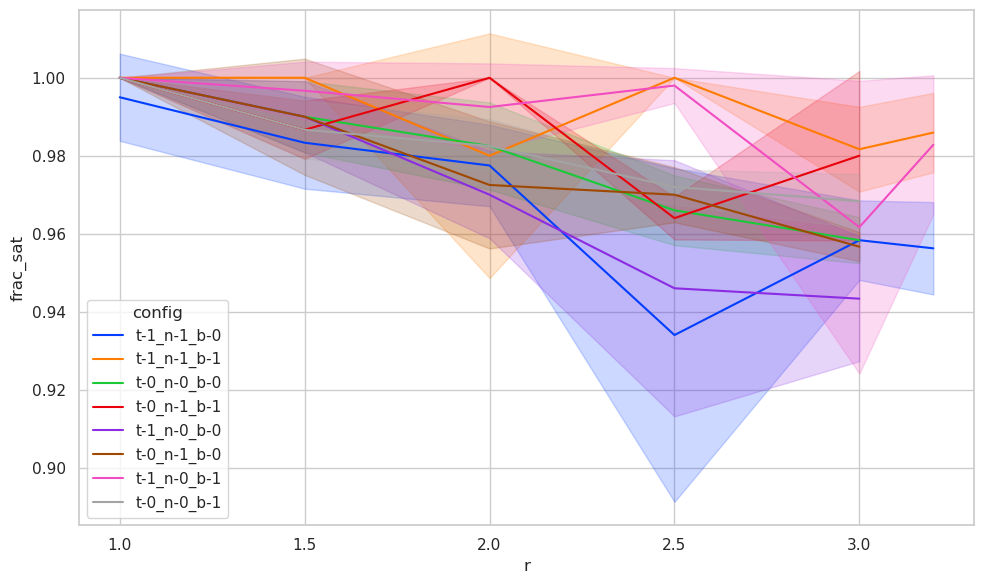

In [22]:
plt.figure(figsize = (10,6))
sns.set_theme(style="whitegrid", palette="bright")
color_pallete = sns.color_palette("bright")
sns.lineplot(data=df_results, x="r", y="frac_sat", hue="config", errorbar=('ci', 30), palette=color_pallete)
plt.tight_layout()
plt.show()

In [18]:
from src.solvers import pg_solver
from ray import tune, air


# Load best resutls
exp_path = 'hypersearch/pg_solver/0020/0060/rand_n=0020_k=03_m=0060_i=01'
print(f"\nLoading best node2vec config from {exp_path} ...")

restored_tuner = tune.Tuner.restore(path=exp_path,
                                    trainable=pg_solver)
results = restored_tuner.get_results()

best_result = results.get_best_result(metric='num_sat_greedy', mode="max")

best_config = best_result.config  # Get best trial's hyperparameters
best_logdir = best_result.log_dir  # Get best trial's logdir
best_checkpoint = best_result.checkpoint  # Get best trial's best checkpoint
best_metrics = best_result.metrics  # Get best trial's last results
best_result_df = best_result.metrics_dataframe  # Get best result as pandas dataframe

The trainable will be overwritten - this should be done with caution: it's possible to supply an incompatible trainable, and there are no guarantees that the resumed experiment will continue successfully. If you encounter errors during training, ensure that you are passing in the same trainable that was passed into the initial `Tuner` object.



Loading best node2vec config from hypersearch/pg_solver/0020/0060/rand_n=0020_k=03_m=0060_i=01 ...


Checkpoint(local_path=/home/omargp/Documents/Code/Learning-SAT-Solvers/hypersearch/pg_solver/0020/0060/rand_n=0020_k=03_m=0060_i=01/pg_solver_f299a7d7_2_accumulation_episodes=1,alpha_ema=0.9600,assignment_emb_size=64,baseline=ema,batch_size=32,beta_entropy=0,che_2023-04-11_22-47-06/checkpoint_000019)

In [17]:
import torch 
import os
state_dict = torch.load(os.path.join(logdir, "checkpoints/checkpoint.pt"))
state_dict

(OrderedDict([('emb_module.variable_proj.weight',
               tensor([[-0.0640,  0.1685,  0.0168,  ..., -0.0036, -0.1224, -0.0920],
                       [-0.0303,  0.1069, -0.2133,  ..., -0.1760,  0.0268, -0.0937],
                       [ 0.1392,  0.0933,  0.1237,  ..., -0.2027,  0.1316,  0.0807],
                       ...,
                       [-0.1672, -0.0945, -0.1533,  ..., -0.1619, -0.1734,  0.1912],
                       [ 0.1325,  0.1345,  0.1284,  ...,  0.0404, -0.1324,  0.0196],
                       [-0.0336, -0.0561,  0.1682,  ...,  0.1407,  0.0686,  0.1513]])),
              ('emb_module.variable_proj.bias',
               tensor([ 0.1760,  0.0036,  0.0509, -0.0444,  0.1520, -0.1757,  0.0575,  0.0925,
                        0.0054,  0.0683, -0.0521,  0.0286, -0.1848,  0.1836, -0.2051,  0.0035,
                       -0.0410, -0.0055,  0.0224, -0.1753, -0.1635,  0.0691,  0.0033,  0.0954,
                       -0.1325,  0.0382, -0.1888, -0.0163, -0.1367, -0.0819,